## Task # 3 - To Explore Unsupervised Machine Learning


From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [1]:
#importing libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the data
data = pd.read_csv('iris.csv')
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Preparing Data for Model

In [3]:
X= data.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Applying K-Means

In [4]:
X= X.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters= k, n_init=10, max_iter=300, random_state = 0).fit(X)
    wcss.append(kmeans.inertia_)

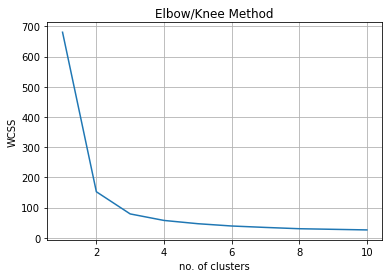

In [5]:
# Finding the optimum number of clusters by elbow method

plt.plot(range(1,11),wcss)
plt.xlabel("no. of clusters")
plt.ylabel("WCSS")
plt.title("Elbow/Knee Method")
plt.grid()
plt.show()

From the above graph we observe that at the elbow i.e in the x-axis where the number of cluster is 3, there is no significant decrement in WCSS (Within Cluster Sum of Squares). Therefore we take optimal_k (optimal no. of cluster) as 3.

In [6]:
optimal_k = 3
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=300, random_state = 0).fit(X)
y_kmeans = kmeans.labels_
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [7]:
#gives counts of datapoints in each cluster
np.unique(kmeans.labels_, return_counts= True)

(array([0, 1, 2]), array([38, 50, 62], dtype=int64))

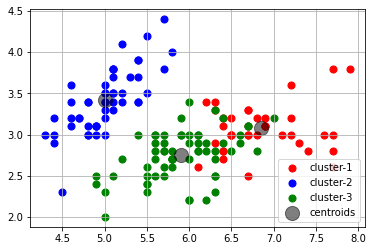

In [8]:
# Visualising the clusters - On the first two columns

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=50, c='red',label= 'cluster-1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=50, c='blue',label= 'cluster-2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s=50, c='green',label= 'cluster-3')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label= 'centroids');
plt.grid()
plt.legend()
plt.show()